# In this notebook i will check the marketing KPIs for a dataset, see what is the best campaign and which should the company fix issues with it

In [ ]:
# load the dataset
import pandas as pd
df = pd.read_csv("online_advertising_performance_data.csv")
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,Unnamed: 12,Unnamed: 13
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,NaN,NaN
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,NaN,NaN
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,NaN,NaN
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,NaN,NaN
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,NaN,NaN


In [ ]:
# see the type of the columns if something  should be fixed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15408 entries, 0 to 15407
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month                    15408 non-null  object 
 1   day                      15408 non-null  int64  
 2   campaign_number          15408 non-null  object 
 3   user_engagement          15408 non-null  object 
 4   banner                   15408 non-null  object 
 5   placement                14995 non-null  object 
 6   displays                 15408 non-null  int64  
 7   cost                     15408 non-null  float64
 8   clicks                   15408 non-null  int64  
 9   revenue                  15408 non-null  float64
 10  post_click_conversions   15408 non-null  int64  
 11  post_click_sales_amount  15408 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
dtypes: float64(5), int64(4

In [ ]:
# drop uneeded columns
df = df. drop(["Unnamed: 12", "Unnamed: 13"], axis  =1)

In [ ]:
# Click through rate
df['CTR'] = (df['clicks'] / df['displays']) * 100
df.head()

,month,day,campaign_number,user_engagement,banner,placement,displays,cost,clicks,revenue,post_click_conversions,post_click_sales_amount,CTR
0,April,1,camp 1,High,160 x 600,abc,4,0.0060,0,0.0000,0,0.0000,0.000000
1,April,1,camp 1,High,160 x 600,def,20170,26.7824,158,28.9717,23,1972.4602,0.783342
2,April,1,camp 1,High,160 x 600,ghi,14701,27.6304,158,28.9771,78,2497.2636,1.074757
3,April,1,camp 1,High,160 x 600,mno,171259,216.8750,1796,329.4518,617,24625.3234,1.048704
4,April,1,camp 1,Low,160 x 600,def,552,0.0670,1,0.1834,0,0.0000,0.181159


In [ ]:
# see the total clicks and clicks per campaign
totalclicks = df['clicks'].sum()

campaignclicks = df.groupby('campaign_number')['clicks'].sum().reset_index()
campaignclicks['rank'] = campaignclicks['clicks'].rank(method='dense', ascending=False).astype(int)
campaignclicks = campaignclicks.sort_values('rank')
print(totalclicks)
print(campaignclicks)

2492837
  campaign_number   clicks  rank
0          camp 1  1409136     1
1          camp 2   881158     2
2          camp 3   202543     3


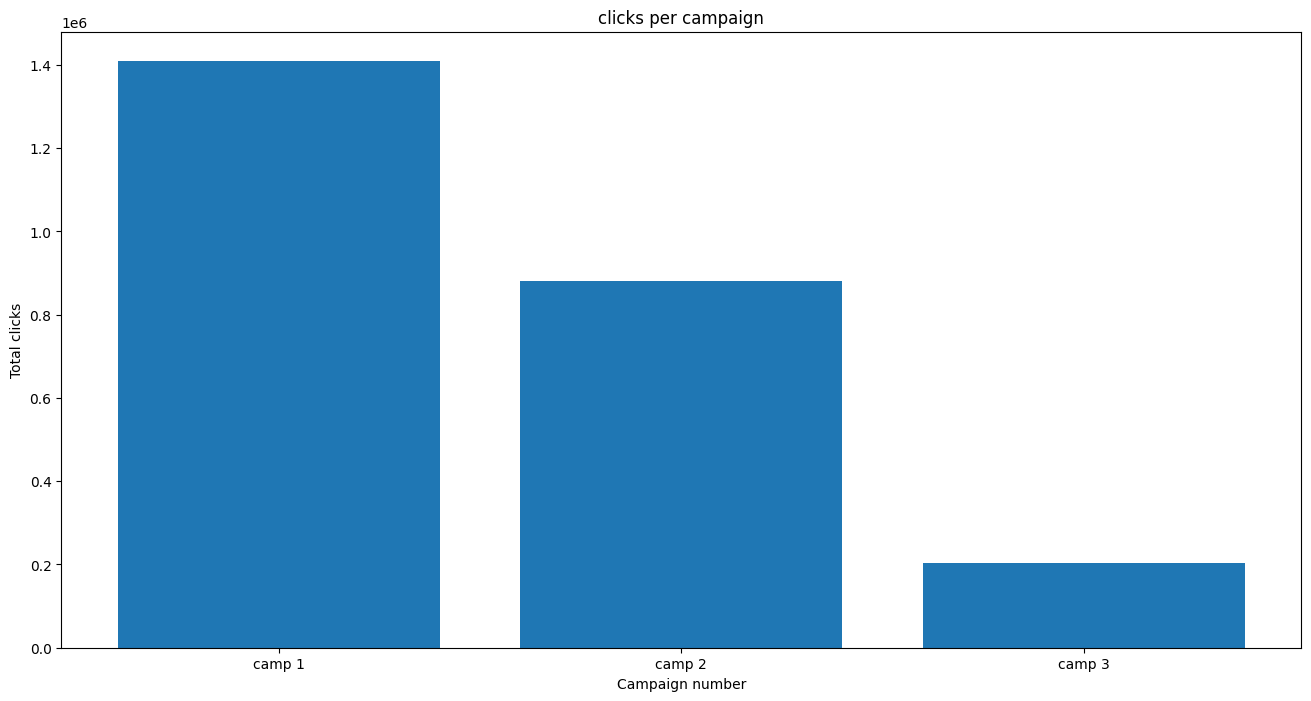

In [ ]:
# visualize it
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.bar(campaignclicks['campaign_number'].astype(str), campaignclicks['clicks'])
plt.title('clicks per campaign')
plt.xlabel('Campaign number')
plt.ylabel('Total clicks')
plt.show()

In [ ]:
# overall marketing performance rates and adding it to a dataset
marketingperformance = df.groupby('campaign_number').agg({'clicks': 'sum',
                                                          'displays': 'sum',
                                                          'cost': 'sum',
                                                          'revenue': 'sum'}).reset_index()
marketingperformance['CTR'] = (marketingperformance['clicks'] / marketingperformance['displays']) * 100
marketingperformance['CPC'] = marketingperformance['cost'] / marketingperformance['clicks']
marketingperformance['ROAS'] = marketingperformance['revenue'] / marketingperformance['cost']

marketingperformance

,campaign_number,clicks,displays,cost,revenue,CTR,CPC,ROAS
0,camp 1,1409136,143311319,150688.5798,230535.3563,0.983269,0.106937,1.529879
1,camp 2,881158,45492269,17037.3496,34890.4153,1.936940,0.019335,2.047878
2,camp 3,202543,50214137,7467.0663,10838.7905,0.403359,0.036867,1.451546


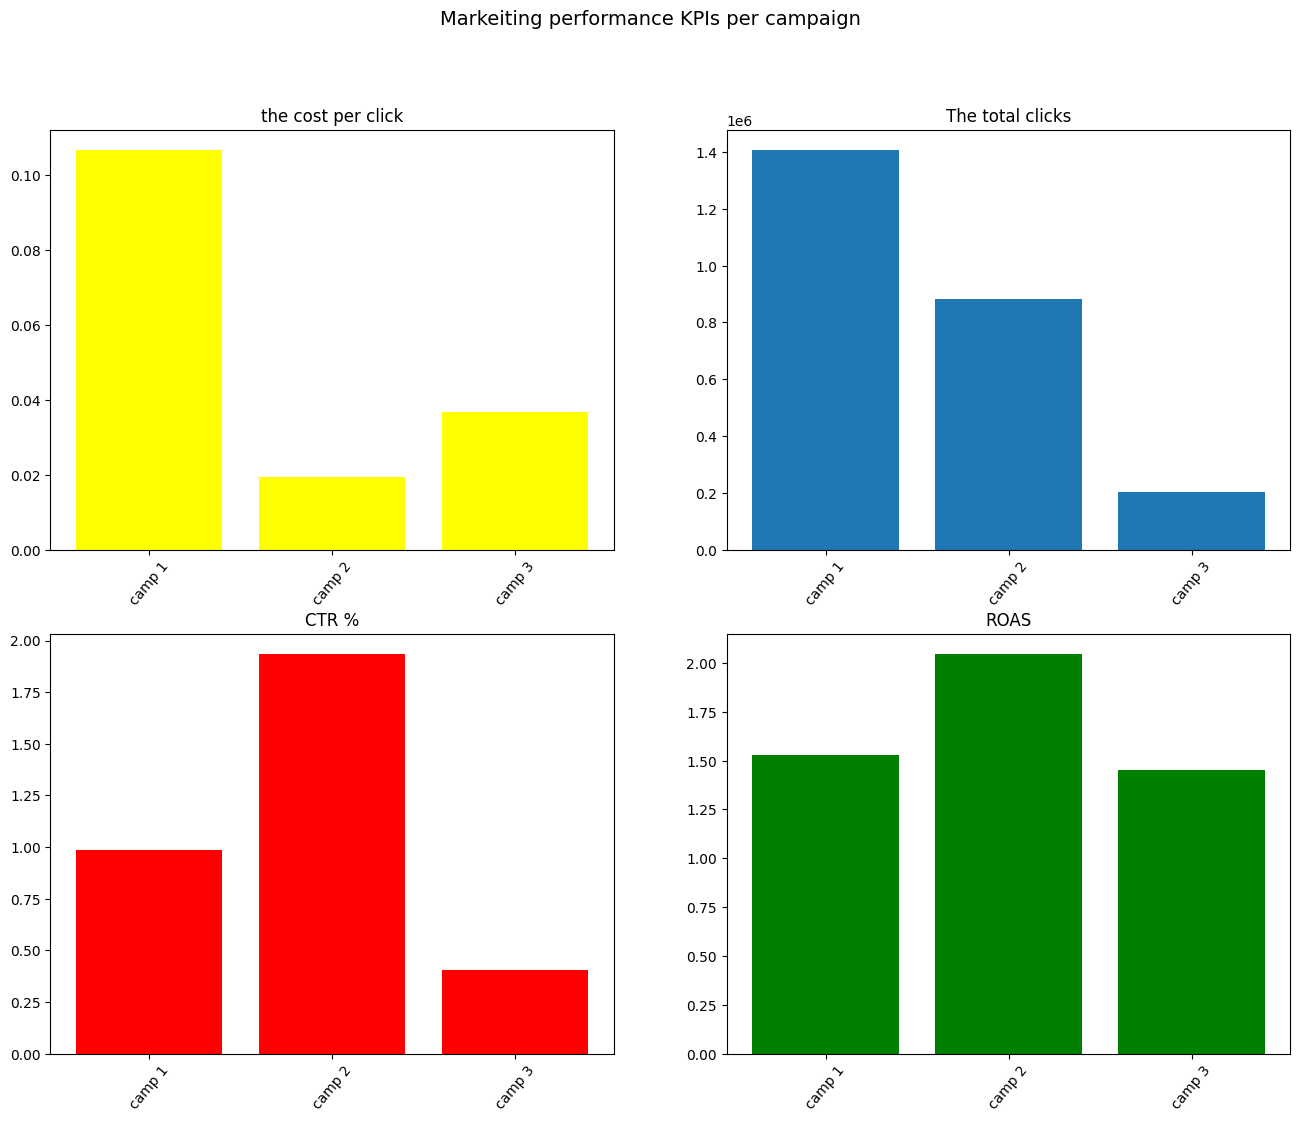

In [ ]:
# makign plots for the new metrics based on the campaign types
fig, axes = plt.subplots(2,2, figsize=(16, 12))
fig.suptitle('Marketing performance KPIs per campaign', fontsize=14)

# the clicks
axes[0,1].bar(marketingperformance['campaign_number'].astype(str), marketingperformance['clicks'])
axes[0,1].set_title('The total clicks')
axes[0,1].tick_params(axis='x', rotation=50)
# Click through rare percentage
axes[1,0].bar(marketingperformance['campaign_number'].astype(str), marketingperformance['CTR'], color='red')
axes[1,0].set_title('CTR %')
axes[1,0].tick_params(axis='x', rotation=50)
# CPC
axes[0,0].bar(marketingperformance['campaign_number'].astype(str), marketingperformance['CPC'], color='yellow')
axes[0,0].set_title('the cost per click')
axes[0,0].tick_params(axis='x', rotation=50)
# Return on AD rate
axes[1,1].bar(marketingperformance['campaign_number'].astype(str), marketingperformance['ROAS'], color='GREEN')
axes[1,1].set_title('ROAS')
axes[1,1].tick_params(axis='x', rotation=50)

# Results

campaign 1 trigger the most clicks

even if campaign 1 hve the most click, it is campaign 2 that make the most revenue

campaign cost the company the most cost per clicks, and the team should on it problems and why campaing 2 is more promising for customers